# Correlation Viz

In [1]:
from homologous_point_prediction.data_processing.helpers import load_mri, load_histology, pad_points
from homologous_point_prediction.models.helpers import load_model
from tensorflow.keras import Model
import matplotlib.pyplot as plt
from seaborn import heatmap
import tensorflow as tf
import numpy as np
import os

### Data

In [2]:
slide_dir = "../data/1122/7"
mri = np.load(os.path.join(slide_dir, "moving.npy"))
hist = np.load(os.path.join(slide_dir, "fixed.npy"))
mri_points = np.load(os.path.join(slide_dir, "mri_points.npy"))
hist_points = np.load(os.path.join(slide_dir, "hist_points.npy"))

### Model

In [3]:
model = load_model("/home/ruchtia/git/homologous_point_prediction/homologous_point_prediction/outputs/05-02-22|13:37:43/25-6.76")
gather_model = Model(inputs=model.input, outputs=model.get_layer("gather").output)
attention_model = Model(inputs=model.input, outputs=model.get_layer("attention").output)

### Inference

In [4]:
inputs = [hist.reshape((1,512,512,1)), mri.reshape((1,512,512,1))]
inputs.append(pad_points(hist_points, 75).reshape(1, 75, 2))
inputs.append(np.zeros((1,1), dtype=np.int32))
inputs.append(np.ones((1,1), dtype=np.int32))
point_correlations = gather_model.predict(inputs)[0]
predicted_points = model(inputs)[0]

# Viz

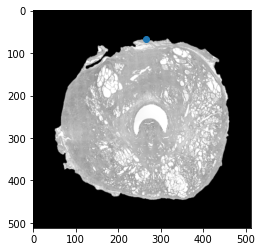

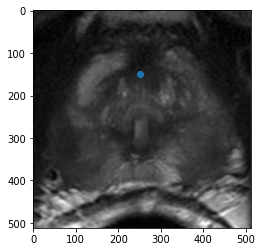

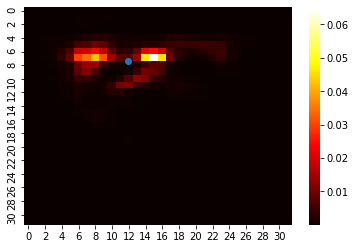

In [5]:
selected_point = 0
plt.imshow(hist, cmap="gray")
plt.scatter([hist_points[selected_point][1]], [hist_points[selected_point][0]])
plt.show()

plt.imshow(mri, cmap="gray")
plt.scatter([mri_points[selected_point][1]], [mri_points[selected_point][0]])
plt.show()

heatmap(point_correlations[selected_point].reshape((32, 32)), cmap='hot')
plt.scatter([predicted_points[selected_point][1] * (32/512)], [predicted_points[selected_point][0] * (32/512)])
#plt.scatter([mri_points[selected_point][1] * (32/512)], [mri_points[selected_point][0] * (32/512)], c="green")